In [ ]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, firwin, gaussian
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, TimeDistributed, Reshape, Lambda
from tensorflow.keras.models import Model
from keras.optimizers import Adam
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
h5_file_name = 'steel_data.h5'
destination_path = '/content/drive/MyDrive/' + h5_file_name

with h5py.File(destination_path, 'r') as hf:
    X_train = hf['X_train'][:]
    X_test = hf['X_test'][:]
    y_train = hf['y_train'][:]
    y_test = hf['y_test'][:]

In [ ]:
def mean_std(data,axis = 0):
    mean = np.mean(data , axis = axis, keepdims = True)
    std = np.std(data, axis = axis, keepdims = True) + 1e-9
    # normalized_data = (data - mean) / st
    return mean, std

def standard_normalize(data,axis = 0):
    mean = np.mean(data , axis = axis, keepdims = True)
    std = np.std(data, axis = axis, keepdims = True) + 1e-9
    normalized_data = (data - mean) / std
    return normalized_data

checkpoint= ModelCheckpoint(
    "best_model_weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min",
    verbose=1
)

def get_callbacks(patience):
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=patience // 2,
        min_lr=1e-12,
        verbose=1
    )
    return [checkpoint, reduce_lr]

In [ ]:
X_train_norm = standard_normalize(X_train)
mean_train, std_train = mean_std(X_train)

In [ ]:
X_test_norm = (X_test - mean_train)/std_train

In [ ]:
X_test.shape

(8235, 500, 1)

In [ ]:
from keras.models import load_model
model_1 = load_model('thickness_prediction_model.h5')

In [ ]:
y_test_result = model_1.predict(X_test_norm)

258/258 [==============================] - 67s 240ms/step


In [ ]:
y_test = np.squeeze(y_test, axis=-1)
lof_test = y_test[:, 0:1]
thickness_test = y_test[:, 1:2]

lof_test_result = y_test_result[:, 0:1]
thickness_test_result = y_test_result[:, 1:2]

In [ ]:
lof_test_result

array([[0.6814291 ],
       [1.9542582 ],
       [0.55908895],
       ...,
       [0.44189557],
       [0.8492051 ],
       [2.0021343 ]], dtype=float32)

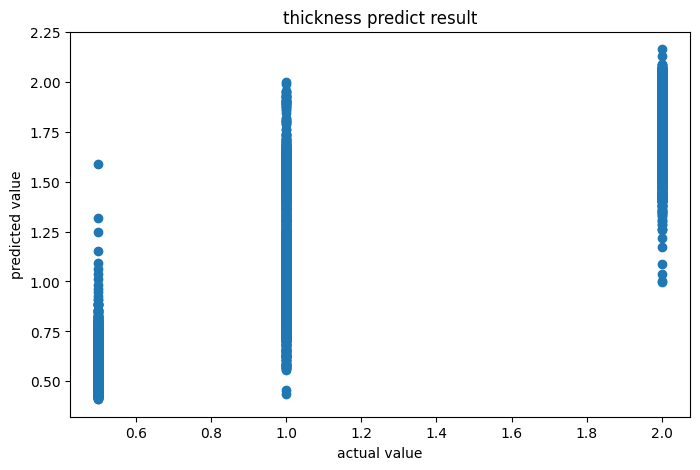

In [ ]:
plt.figure(figsize = (8,5))
plt.scatter(lof_test, lof_test_result)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("thickness predict result")
plt.show()

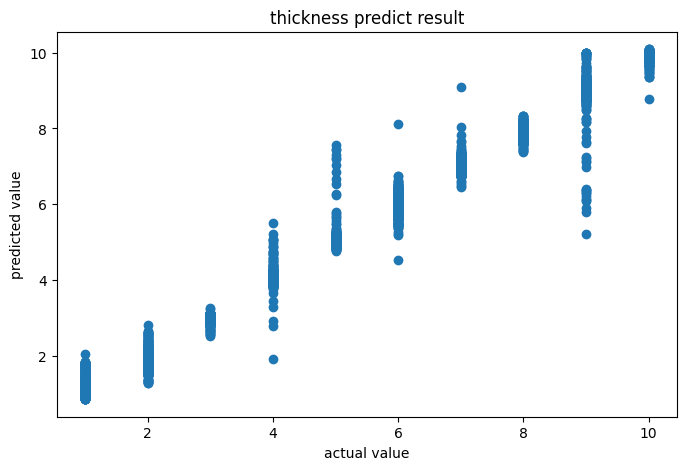

In [ ]:
plt.figure(figsize = (8,5))
plt.scatter(thickness_test, thickness_test_result)
plt.xlabel("actual value")
plt.ylabel("predicted value")
plt.title("thickness predict result")
plt.show()

In [ ]:
df = np.concatenate((X_test_norm, y_test.reshape(-1, 2, 1)), axis=1)
df.shape

(8235, 502, 1)

In [ ]:
condition_test_1 = np.isin(df[:, 501, 0], [1])
condition_test_2 = np.isin(df[:, 501, 0], [2])
condition_test_3 = np.isin(df[:, 501, 0], [3])
condition_test_4 = np.isin(df[:, 501, 0], [4])
condition_test_5 = np.isin(df[:, 501, 0], [5])
condition_test_6 = np.isin(df[:, 501, 0], [6])
condition_test_7 = np.isin(df[:, 501, 0], [7])
condition_test_8 = np.isin(df[:, 501, 0], [8])
condition_test_9 = np.isin(df[:, 501, 0], [9])
condition_test_10 = np.isin(df[:, 501, 0], [10])

y_test_1 = df[condition_test_1, 501]
X_test_1 = df[condition_test_1, :501, :]

y_test_2 = df[condition_test_2, 501]
X_test_2 = df[condition_test_2, :501, :]

y_test_3 = df[condition_test_3, 501]
X_test_3 = df[condition_test_3, :501, :]

y_test_4 = df[condition_test_4, 501]
X_test_4 = df[condition_test_4, :501, :]

y_test_5 = df[condition_test_5, 501]
X_test_5 = df[condition_test_5, :501, :]

y_test_6 = df[condition_test_6, 501]
X_test_6 = df[condition_test_6, :501, :]

y_test_7 = df[condition_test_7, 501]
X_test_7 = df[condition_test_7, :501, :]

y_test_8 = df[condition_test_8, 501]
X_test_8 = df[condition_test_8, :501, :]

y_test_9 = df[condition_test_9, 501]
X_test_9 = df[condition_test_9, :501, :]

y_test_10 = df[condition_test_10, 501]
X_test_10 = df[condition_test_10, :501, :]

In [ ]:
X_test.shape

(8235, 500, 1)

In [ ]:
condition_test_lof_0_5 = np.isin(df[:, 500, 0], [0.5])
condition_test_lof_1 = np.isin(df[:, 500, 0], [1])
condition_test_lof_2 = np.isin(df[:, 500, 0], [2])

y_test_lof_0_5 = df[condition_test_lof_0_5, 500]
X_test_lof_0_5 = df[condition_test_lof_0_5, :500, :]

y_test_lof_1 = df[condition_test_lof_1, 500]
X_test_lof_1 = df[condition_test_lof_1, :500, :]

y_test_lof_2 = df[condition_test_lof_2, 500]
X_test_lof_2 = df[condition_test_lof_2, :500, :]

In [ ]:
X_test_lof_2.shape

(2816, 500, 1)

In [ ]:
# Loại bỏ cột cuối và thay đổi hình dạng của từng tập dữ liệu và lưu vào các biến riêng lẻ
X_test_1 = X_test_1[:, :-1, :]
X_test_2 = X_test_2[:, :-1, :]
X_test_3 = X_test_3[:, :-1, :]
X_test_4 = X_test_4[:, :-1, :]
X_test_5 = X_test_5[:, :-1, :]
X_test_6 = X_test_6[:, :-1, :]
X_test_7 = X_test_7[:, :-1, :]
X_test_8 = X_test_8[:, :-1, :]
X_test_9 = X_test_9[:, :-1, :]
X_test_10 = X_test_10[:, :-1, :]

In [ ]:
X_test_1.shape

(823, 500, 1)

In [ ]:
X_test_list = [X_test_1, X_test_2, X_test_3, X_test_4, X_test_5, X_test_6, X_test_7, X_test_8, X_test_9, X_test_10]

y_test_result_list = []
for X_test in X_test_list:
    y_test_result = model_1.predict(X_test)
    y_test_result_list.append(y_test_result)

y_test_1_result = y_test_result_list[0]
y_test_2_result = y_test_result_list[1]
y_test_3_result = y_test_result_list[2]
y_test_4_result = y_test_result_list[3]
y_test_5_result = y_test_result_list[4]
y_test_6_result = y_test_result_list[5]
y_test_7_result = y_test_result_list[6]
y_test_8_result = y_test_result_list[7]
y_test_9_result = y_test_result_list[8]
y_test_10_result = y_test_result_list[9]

26/26 [==============================] - 5s 200ms/step


In [ ]:
y_test_1_result.shape

(823, 2)

In [ ]:
thickness_test_result_1 = y_test_1_result[:, 1:2]
thickness_test_result_2 = y_test_2_result[:, 1:2]
thickness_test_result_3 = y_test_3_result[:, 1:2]
thickness_test_result_4 = y_test_4_result[:, 1:2]
thickness_test_result_5 = y_test_5_result[:, 1:2]
thickness_test_result_6 = y_test_6_result[:, 1:2]
thickness_test_result_7 = y_test_7_result[:, 1:2]
thickness_test_result_8 = y_test_8_result[:, 1:2]
thickness_test_result_9 = y_test_9_result[:, 1:2]
thickness_test_result_10 = y_test_10_result[:, 1:2]

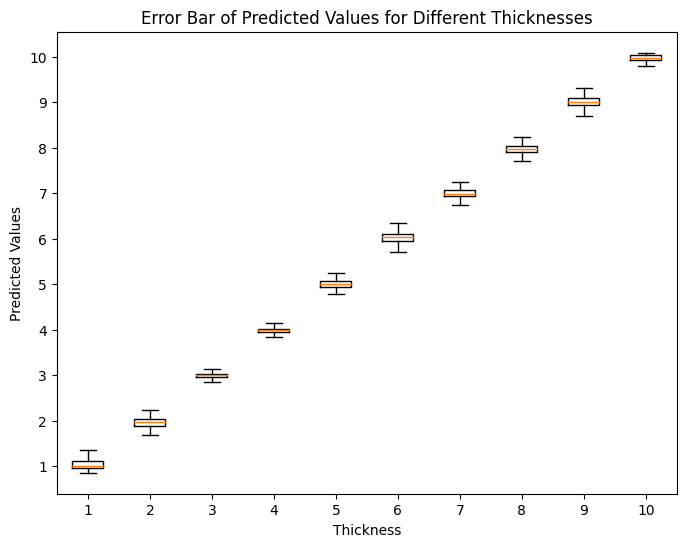

In [ ]:
import matplotlib.pyplot as plt

# Danh sách các tập dữ liệu y_test_result tương ứng với từng tập X_test đã được dự đoán
y_test_result_list = [thickness_test_result_1,thickness_test_result_2,thickness_test_result_3,thickness_test_result_4,thickness_test_result_5,thickness_test_result_6,thickness_test_result_7,thickness_test_result_8,thickness_test_result_9,thickness_test_result_10]


data_to_plot = [result.flatten() for result in y_test_result_list]

plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['1', '2', '3', '4','5', '6', '7', '8','9', '10'],showfliers=False)
plt.xticks(range(1, 11), ['1', '2', '3', '4','5', '6', '7', '8','9', '10'])
plt.yticks(range(1, 11))
plt.xlabel('Thickness')
plt.ylabel('Predicted Values')
plt.title('Error Bar of Predicted Values for Different Thicknesses')
plt.show()


In [ ]:
X_test_list = [X_test_lof_0_5, X_test_lof_1, X_test_lof_2]

y_test_result_list = []
for X_test in X_test_list:
    y_test_result = model_1.predict(X_test)
    y_test_result_list.append(y_test_result)

y_test_0_5_result = y_test_result_list[0]
y_test_1_result = y_test_result_list[1]
y_test_2_result = y_test_result_list[2]

88/88 [==============================] - 22s 253ms/step


In [ ]:
lof_test_0_5 = y_test_0_5_result[:, 0:1]
lof_test_1 = y_test_1_result[:, 0:1]
lof_test_2 = y_test_2_result[:, 0:1]

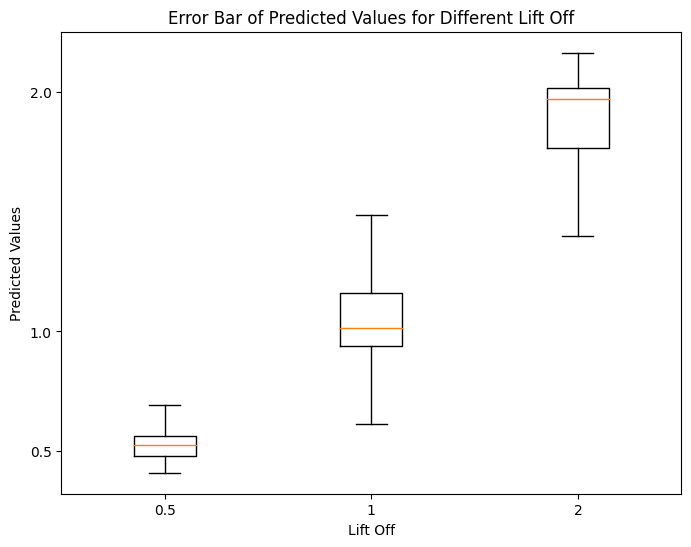

In [ ]:
import matplotlib.pyplot as plt

y_test_result_list = [lof_test_0_5, lof_test_1, lof_test_2]

data_to_plot = [result.flatten() for result in y_test_result_list]

plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['0.5', '1', '2'], showfliers=False)
plt.xticks(range(1, 4), ['0.5', '1', '2'])
plt.yticks([0.5, 1, 2])
plt.xlabel('Lift Off')
plt.ylabel('Predicted Values')
plt.title('Error Bar of Predicted Values for Different Lift Off')
plt.show()
